# **環境設定**

In [ ]:
import os
import requests
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties



ACCESS_TOKEN = "" #這裡放accesstoken

ImportError: cannot import name 'StanderScaler' from 'sklearn.preprocessing' (/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/__init__.py)

In [ ]:
!pip install sklearn
from sklearn.preprocessing import StandardScaler

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

# 字體處理
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf
myfont = FontProperties(fname=r'/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# **主頁瀏覽**

## 資料讀入和處理

這裡的程式碼會把我threads主頁每天有多少人次的瀏覽抓下來，從7/1開始至10月初

In [ ]:
# 資料讀入
url = (
    f'https://graph.threads.net/v1.0/me/threads_insights?'
    f'metric=views,followers_count&'
    f'until=1728734400&since=1719835200&'
    f'access_token={ACCESS_TOKEN}'
)

response = requests.get(url)  # 發送 GET 請求
if response.status_code != 200:   # 檢查請求是否成功
    raise Exception(f"API 請求失敗，狀態碼：{response.status_code}, 回應：{response.text}")
data = response.json()  # 解析 JSON 回應

# 資料處理：
views_data = next((item for item in data.get('data', []) if item.get('name') == 'views'), None) # 查找名稱為 "views" 的數據
if not views_data:
    raise ValueError("在 API 回應中未找到 'views' 的資料。")
values = views_data.get('values', []) # 提取 'values' 列表
if not values:  # 檢查是否有數據
    raise ValueError("'views' 資料中沒有 'values'。")
df = pd.DataFrame(values)
df['end_time'] = pd.to_datetime(df['end_time'])   # 可選：將 'end_time' 轉換為 datetime 格式
df.rename(columns={'value': 'views', 'end_time': 'date_strf'}, inplace=True) # 重命名欄位（如果需要）

df['date'] = df['date_strf'].dt.strftime('%m-%d')  # 使用 strftime 取得 MM-DD 格式
df.drop(columns=['date_strf'], inplace=True)

print(df.head())

   views   date
0    579  07-01
1     62  07-02
2     84  07-03
3    171  07-04
4     69  07-05


## 列出所有資料

In [ ]:
print(df[["date","views"]])

# 這段程式把7/1開始每天的主業瀏覽人次抓下來

      date  views
0    07-01    579
1    07-02     62
2    07-03     84
3    07-04    171
4    07-05     69
5    07-06     57
6    07-07     35
7    07-08     44
8    07-09     25
9    07-10     31
10   07-11     38
11   07-12     44
12   07-13     83
13   07-14     72
14   07-15     37
15   07-16     46
16   07-17     47
17   07-18     37
18   07-19     25
19   07-20     35
20   07-21     36
21   07-22    167
22   07-23    131
23   07-24    232
24   07-25     87
25   07-26    125
26   07-27    116
27   07-28    294
28   07-29    444
29   07-30     52
30   07-31     49
31   08-01     55
32   08-02     88
33   08-03     45
34   08-04     40
35   08-05     38
36   08-06    306
37   08-07    603
38   08-08    150
39   08-09    207
40   08-10     97
41   08-11    185
42   08-12    673
43   08-13    180
44   08-14   6978
45   08-15   2279
46   08-16   2312
47   08-17   1149
48   08-18    210
49   08-19    363
50   08-20    177
51   08-21    748
52   08-22   6595
53   08-23   2784
54   08-24

## 將瀏覽次數變化畫成折線圖(Y軸值為"log10(1 + views)")

把每日的瀏覽變化畫成折線圖，x軸為日期，y軸為人次。因為瀏覽次數的數量級相差很大(少的有幾十，多的可以到幾萬)，所以把人次取log，讓數量級能更接近

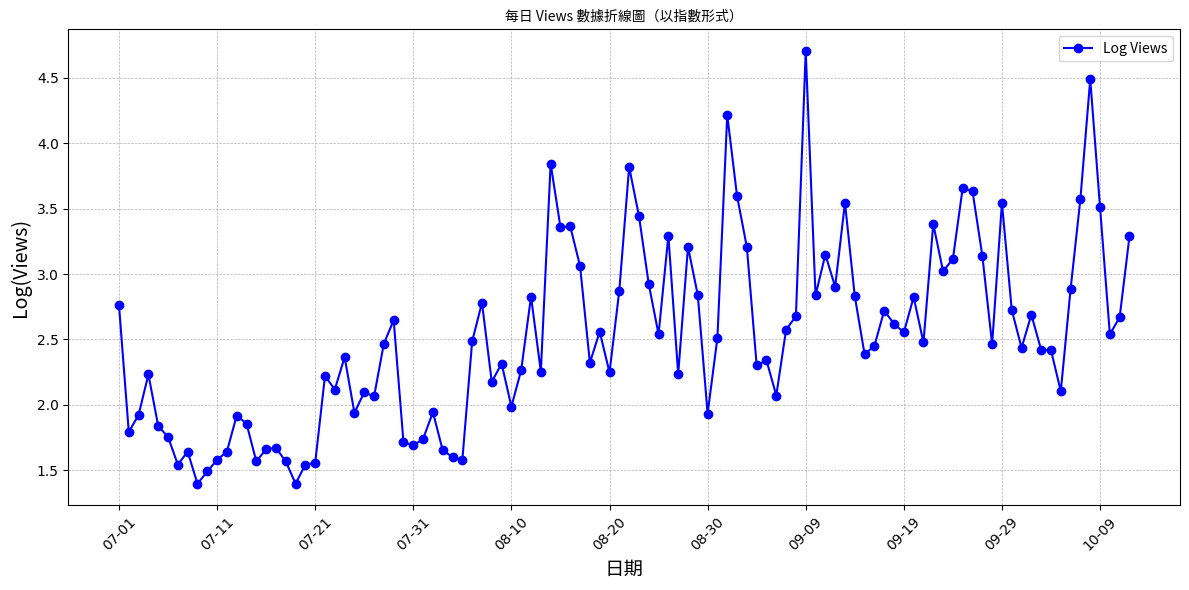

In [ ]:
df['log_views'] = np.log10(df['views'])  # 計算 log(1 + views)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['log_views'], marker='o', linestyle='-', color='b', label='Log Views')

plt.title('每日 Views 數據折線圖（以指數形式）',fontproperties=myfont)
plt.xlabel('日期', fontsize=14,fontproperties=myfont)
plt.ylabel('Log(Views)', fontsize=14,fontproperties=myfont)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # 每 10 天標記一次

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend(loc = 'best',prop=myfont)
plt.tight_layout()

plt.show()

##  列出瀏覽次數最多的前幾天(預設為20天)




In [ ]:
top_views = df.nlargest(20, 'views') #可將前10筆改為其他數字
print(top_views)

     views   date
70   50646  09-09
99   30814  10-08
62   16422  09-01
44    6978  08-14
52    6595  08-22
86    4545  09-25
87    4290  09-26
63    3953  09-02
98    3763  10-07
74    3504  09-13
90    3500  09-29
100   3237  10-09
53    2784  08-23
83    2412  09-22
46    2312  08-16
45    2279  08-15
56    1964  08-26
103   1937  10-12
58    1613  08-28
64    1606  09-03


##  列出瀏覽次數多於1000的日期

In [ ]:
high_views = df[df['views'] > 1000]
print(high_views)

     views   date
44    6978  08-14
45    2279  08-15
46    2312  08-16
47    1149  08-17
52    6595  08-22
53    2784  08-23
56    1964  08-26
58    1613  08-28
62   16422  09-01
63    3953  09-02
64    1606  09-03
70   50646  09-09
72    1410  09-11
74    3504  09-13
83    2412  09-22
84    1049  09-23
85    1305  09-24
86    4545  09-25
87    4290  09-26
88    1386  09-27
90    3500  09-29
98    3763  10-07
99   30814  10-08
100   3237  10-09
103   1937  10-12


# **貼文分析**

## 資料收集與處理：找出所以發過的貼文

這裡爬的是我所有發過的貼文，包含引用、轉發等等，但因轉發的貼文不會有觀看數、讚數等資料，故在資料處理時把他剔除

In [ ]:
all_threads_data = []
next_url = f'https://graph.threads.net/v1.0/me/threads?fields=id,media_type,permalink,username,text,timestamp&access_token={ACCESS_TOKEN}'

while next_url:
    response = requests.get(next_url)
    if response.status_code != 200:
        raise Exception(f"API 請求失敗，狀態碼：{response.status_code}, 回應：{response.text}")
    data = response.json()
    threads_data = data.get('data', [])
    if not threads_data:
        break  # 如果沒有數據，退出循環
    threads_data = [item for item in threads_data if item.get('media_type') != 'REPOST_FACADE']  # 過濾掉 media_type 為 REPOST_FACADE 的資料
    all_threads_data.extend(threads_data)
    next_url = data.get('paging', {}).get('next', None)


In [ ]:
#資料處理
df_threads = pd.DataFrame(all_threads_data)
df_threads['timestamp'] = pd.to_datetime(df_threads['timestamp'])
df_threads['text_first_10'] = df_threads['text'].apply(lambda x: x[:10] if isinstance(x, str) else np.nan)
df_threads['date'] = df_threads['timestamp'].dt.strftime('%m-%d')  # 使用 strftime 取得 MM-DD 格式
df_threads['year'] = df_threads['timestamp'].dt.year



# 顯示結果
print(df_threads.head(5))
print("共發了：",len(df_threads),"筆threads文")

                  timestamp  year
0 2024-10-13 17:52:58+00:00  2024
1 2024-10-13 07:35:51+00:00  2024
2 2024-10-12 03:22:09+00:00  2024
3 2024-10-11 09:01:24+00:00  2024
4 2024-10-11 08:25:45+00:00  2024


## 資料收集與處理：抓取貼文的統計資料

在threads跟貼文有關的api分兩隻，第一支雖然能匹量抓取貼文，但無法得到貼文的詳細資料，如觀看數、讚數等等，另一支則是相反，可以爬到貼文的讚數、觀看數，但一次只能爬一篇貼文。所以這段程式碼在做的事是以上一段程式碼爬到的貼文列表為基準，建立迴圈去爬每篇貼文的詳細資料

In [ ]:
metrics = ['likes', 'replies', 'views', 'reposts']

for index, row in df_threads.iterrows():
    THREADS_MEDIA_ID = row['id']

    url = (
        f'https://graph.threads.net/v1.0/{THREADS_MEDIA_ID}/insights?'
        f'metric={",".join(metrics)}&'
        f'until=1728734400&since=1719835200&'
        f'access_token={ACCESS_TOKEN}'
    )

    try:
        response = requests.get(url)
        response.raise_for_status()  # 檢查請求是否成功

        data = response.json()

        for metric in data.get('data', []):
            metric_name = metric.get('name')
            if metric_name in metrics:
                value = metric['values'][0]['value'] if metric['values'] else 0
                df_threads.loc[index, metric_name] = value

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP 錯誤發生於 ID {THREADS_MEDIA_ID}: {http_err}")
    except Exception as e:
        print(f"發生錯誤於 ID {THREADS_MEDIA_ID}: {e}")

print(df_threads.head())

                  id      media_type  \
0  18034847813229551       TEXT_POST   
1  18060921883688621           IMAGE   
2  18283948588232730           IMAGE   
3  17924515691865803       TEXT_POST   
4  18030713036078777  CAROUSEL_ALBUM   

                                           permalink  username  \
0  https://www.threads.net/@bbd._.26/post/DBEsnyB...  bbd._.26   
1  https://www.threads.net/@bbd._.26/post/DBDl_8m...  bbd._.26   
2  https://www.threads.net/@bbd._.26/post/DBAkK2b...  bbd._.26   
3  https://www.threads.net/@bbd._.26/post/DA-mMvF...  bbd._.26   
4  https://www.threads.net/@bbd._.26/post/DA-iHnU...  bbd._.26   

                                                text  \
0                              為什麼都沒有人推通化/寧夏\n明明就很頂😫   
1  今天煮蝦子蒜炒義大利麵\n煮完的時候意識到一件很笨的事\n就是我其實沒有很喜歡吃蝦子😀\n但...   
2                                       在桃園等公車的平均體驗：   
3                                        誰啊誰會把捷運圖背起來   
4                             國防課參訪被抓去爬山快累死\n爬完去大直爆吃   

                  timesta

##  讚數、留言數、觀看數總覽

列出結果，只印出讚數、回複述、瀏覽數、發文日期，並以每篇貼文的前十個字當作標題

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
print(df_threads[['likes', 'replies', 'views','date','text_first_10']])

     likes  replies    views   date text_first_10
0      2.0      0.0     18.0  10-13    為什麼都沒有人推通化
1      1.0      3.0    100.0  10-13    今天煮蝦子蒜炒義大利
2      2.0      0.0     43.0  10-12    在桃園等公車的平均體
3      0.0      0.0     43.0  10-11    誰啊誰會把捷運圖背起
4      9.0      0.0    234.0  10-11    國防課參訪被抓去爬山
5      4.0      0.0    224.0  10-09    最近的興趣是半夜騎g
6      1.0      0.0     74.0  10-09        存 陪我去吃
7     28.0     10.0   1905.0  10-08    剛剛回宿舍經過安久被
8      2.0      1.0    491.0  10-08    雖然劈腿該罵但還是㊗
9     15.0      4.0   1724.0  10-07    我不是新莊人但我現在
10   291.0     32.0  21290.0  10-07     老師的嘴 騙人的鬼
11    13.0      1.0    453.0  10-07    我今天度過了幾個月來
12     7.0      0.0    218.0  10-06      怎麼有流量大師😀
13    13.0      6.0    282.0  10-04   我下禮拜的課：\n禮拜
14     0.0      0.0    137.0  10-04       去看留言超好笑
15     2.0      0.0    185.0  10-03    在家爽了兩天 明天挑
16     5.0      0.0    171.0  10-02    今天從學校回家的路上
17     2.0      0.0    189.0  10-01   （補蕭舜文的帶）\n蕭
18     5.0      0.0    114.0  09-30      雨傘被幹走-.-


## 畫出變化量

這裡印出的結果被我按掉了(但重跑要好幾分鐘太麻煩了)

In [ ]:
df_threads['timestamp'] = pd.to_datetime(df_threads['timestamp'])
df_threads['log_likes'] = np.log10(df_threads['likes']+1)  # 計算 log(1 + views)

sc_likes = StanderScaler().fit(df_threads['log_likes'])
sc_replies = StanderScaler().fit(df_threads['replies'])
sc_views = StanderScaler().fit(df_threads['views'])

# 設定 x 軸和 y 軸的資料
x = df_threads['timestamp']
y1 = sc_likes.transform(df_threads[['log_likes']])
y2 = sc_replies.transformdf_threads['replies']
y3 = sc_views.transformdf_threads['views']

# 繪製折線圖
plt.figure(figsize=(14, 7))  # 設定圖表大小

plt.plot(x, y1, label='log_likes', marker='o')
# plt.plot(x, y2, label='Replies', marker='s')
# plt.plot(x, y3, label='Views', marker='^')

# 設定圖表的標題和標籤
plt.title('Likes, Replies, and Views Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤以提高可讀性
plt.legend()  # 顯示圖例
plt.grid()  # 添加網格
plt.tight_layout()  # 自動調整子圖參數

# 顯示圖表
plt.show()

NameError: name 'df_threads' is not defined

## 印出各指標最多20則threads文

以不同指標(讚數、瀏覽數等等)，去排序我自己流量最高的貼文，結論，發一些靠北、有爭議的貼文比較容易有流量，比如說靠北政大不是頂大、靠北文山區都在下雨等等

In [ ]:
#讚數
top_likes = df_threads.sort_values(by='likes', ascending=False).head(20)
print(top_likes[['likes', 'text_first_10', 'date']])

     likes text_first_10   date
84   735.0      畢竟政大不是頂大  06-29
62   482.0    這位老兄是不是真的把  08-21
119  394.0   木柵的雨就是\n從辛亥  05-31
10   291.0     老師的嘴 騙人的鬼  10-07
111  184.0    在寫現金流量表的我b  06-04
142  138.0    怎麼會有人資料庫期中  04-23
112   88.0          罵到我了  06-04
28    48.0    商學院：我們讓資管系  09-22
216   48.0    不知道這樣講會不會逆  02-18
45    39.0    開學第一天就逃離木柵  09-09
193   36.0  跟大家宣佈\n\n我要換  03-10
143   35.0   冷知識：\n林口到清大  04-20
206   35.0   政大版本：\n達賢（樓  02-25
50    34.0    應該有些人知道我暑假  09-01
239   33.0    給下學期自己的一些提  01-09
124   32.0          完全是我  05-28
53    31.0            德政  08-29
26    31.0    明天晚上7:30有空  09-24
7     28.0    剛剛回宿舍經過安久被  10-08
23    28.0    我：林口到淡水很快啦  09-29


In [ ]:
#觀看數
top_likes = df_threads.sort_values(by='views', ascending=False).head(20)
print(top_likes[['views', 'text_first_10', 'date']])

       views text_first_10   date
84   58970.0      畢竟政大不是頂大  06-29
10   21290.0     老師的嘴 騙人的鬼  10-07
112   7655.0          罵到我了  06-04
119   7175.0   木柵的雨就是\n從辛亥  05-31
70    5592.0    這個難度基本上是把黑  08-14
111   4859.0    在寫現金流量表的我b  06-04
216   4315.0    不知道這樣講會不會逆  02-18
142   4250.0    怎麼會有人資料庫期中  04-23
26    3559.0    明天晚上7:30有空  09-24
205   3440.0    我覺得台北很棒 但木  02-27
193   2735.0  跟大家宣佈\n\n我要換  03-10
239   2655.0    給下學期自己的一些提  01-09
206   2587.0   政大版本：\n達賢（樓  02-25
196   2291.0        國文沒有頂簽  03-08
28    2290.0    商學院：我們讓資管系  09-22
62    2237.0    這位老兄是不是真的把  08-21
104   2197.0    低卡上面都說周佩婷給  06-13
7     1905.0    剛剛回宿舍經過安久被  10-08
93    1889.0    讓我住莊讓我住莊讓我  06-21
23    1781.0    我：林口到淡水很快啦  09-29


In [ ]:
#轉發數
top_likes = df_threads.sort_values(by='reposts', ascending=False).head(20)
print(top_likes[['reposts', 'text_first_10', 'date']])

     reposts text_first_10   date
119     40.0   木柵的雨就是\n從辛亥  05-31
111     31.0    在寫現金流量表的我b  06-04
84      13.0      畢竟政大不是頂大  06-29
10      12.0     老師的嘴 騙人的鬼  10-07
142      8.0    怎麼會有人資料庫期中  04-23
62       5.0    這位老兄是不是真的把  08-21
152      4.0   沒有要幫黃子佼講話\n  04-09
206      4.0   政大版本：\n達賢（樓  02-25
124      3.0          完全是我  05-28
239      3.0    給下學期自己的一些提  01-09
157      2.0    聽到災情後跑去在ㄙㄨ  04-03
53       1.0            德政  08-29
80       1.0    七月幾乎都窩在林口的  07-22
222      1.0    有人可以跟我換藏壽司  02-15
46       1.0    實際上的木柵：🌧️🌧  09-07
70       1.0    這個難度基本上是把黑  08-14
73       1.0    大家好我在高雄..颱  08-09
185      1.0    我這一生最大的夢想就  03-16
205      1.0    我覺得台北很棒 但木  02-27
26       1.0    明天晚上7:30有空  09-24


In [ ]:
#留言數
top_likes = df_threads.sort_values(by='replies', ascending=False).head(20)
print(top_likes[['replies', 'text_first_10', 'date']])

     replies text_first_10   date
259     41.0    想到如果背單眼去說免  12-12
84      38.0      畢竟政大不是頂大  06-29
193     36.0  跟大家宣佈\n\n我要換  03-10
10      32.0     老師的嘴 騙人的鬼  10-07
179     29.0    今天會計小考終於考完  03-18
216     26.0    不知道這樣講會不會逆  02-18
45      23.0    開學第一天就逃離木柵  09-09
26      21.0    明天晚上7:30有空  09-24
181     19.0    大二都已經剩差不多1  03-17
244     15.0    最近的企劃是問別人跨  12-27
189     15.0    公佈答案 居然沒人猜  03-12
142     15.0    怎麼會有人資料庫期中  04-23
60      14.0    我真的很開心這學期終  08-22
50      14.0    應該有些人知道我暑假  09-01
210     12.0    讚喔我這學期25學分  02-21
112     12.0          罵到我了  06-04
206     12.0   政大版本：\n達賢（樓  02-25
182     12.0    我也希望YouTub  03-17
229     12.0    我現在用的筆電是高一  02-06
29      11.0    禮拜三煮火鍋覺得陳崇  09-21


## 統計每個月的發文數量

結論是我每三個月就會有一個月特別活網，很喜歡發文

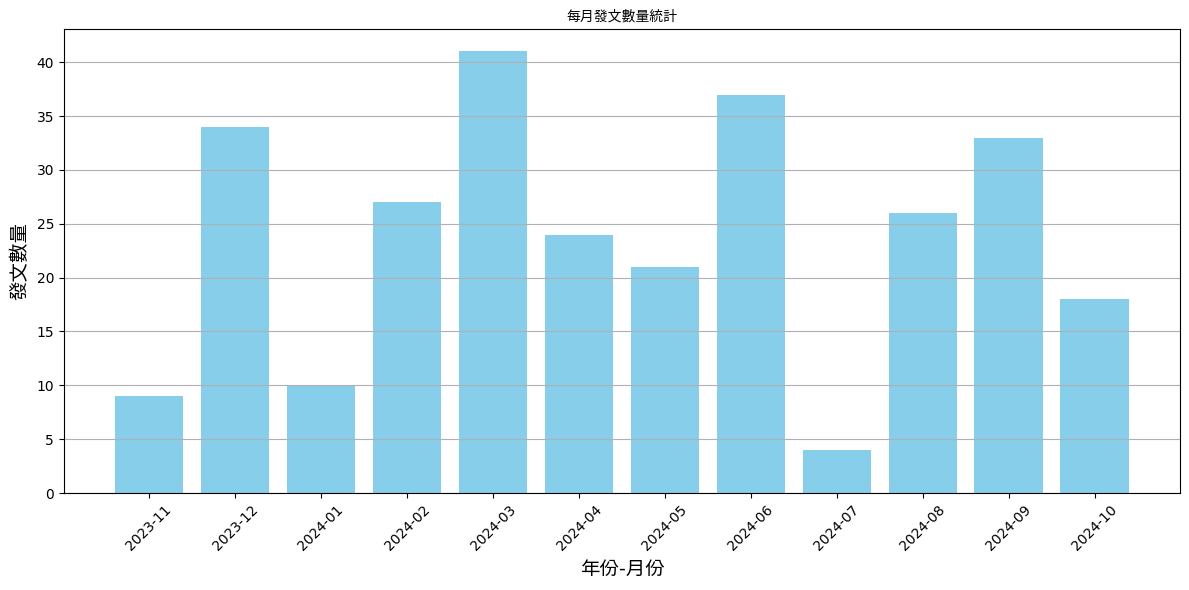

In [ ]:
df_threads['month'] = df_threads['timestamp'].dt.month

# 根據 'year' 和 'month' 統計發文數量
monthly_counts = df_threads.groupby(['year', 'month']).size().reset_index(name='post_count')

# 創建一個新欄位 'year_month' 以便於繪圖
monthly_counts['year_month'] = monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str).str.zfill(2)

# 繪製長條圖
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['year_month'], monthly_counts['post_count'], color='skyblue')

plt.title('每月發文數量統計', fontsize=16,fontproperties=myfont)
plt.xlabel('年份-月份', fontsize=14,fontproperties=myfont)
plt.ylabel('發文數量', fontsize=14,fontproperties=myfont)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
